# Creating an OSMnx Drive Network of Natal-RN City

 This notebook generates a drive network for the city of Natal, RN, using OSMnx and conducts an analysis based on various network metrics. These metrics provide insights into the city's connectivity, accessibility, and overall network structure.

## Metrics Analyzed

- **Cycles**: Identifies cycles in the network, representing closed loops that indicate areas with higher local connectivity.

- **Average Shortest Path Length**: Calculates the average distance of the shortest paths between nodes, which reflects general accessibility across the network.

- **Diameter of Network**: Measures the longest shortest path within the network, indicating the maximum distance between any two nodes.

- **Shortest Path Length**: Determines the shortest paths between specific nodes or regions, useful for analyzing direct accessibility.

- **Connected Components**: Examines isolated sub-networks within the larger network, helping identify disconnected or less accessible areas.

- **Giant Connected Component**: The largest connected sub-network, representing the main area of high connectivity within the city.

- **Number of Connected Components**: Counts the total disconnected segments in the network, highlighting isolated regions.

- **BFS (Breadth-First Search)**: Explores the network level-by-level from a starting node, useful for assessing reachable areas from a specific point.

- **DFS (Depth-First Search)**: Traverses the network by going as deep as possible from a starting node, providing insights into possible paths and clusters.

- **SCC (Strongly Connected Components)**: Identifies clusters of nodes where every node is reachable from any other node within the component, indicating areas of high interconnectivity.

- **WCC (Weakly Connected Components)**: Highlights components where each node is accessible by ignoring direction, providing a sense of general connectivity.

- **Clustering Coefficient**: Measures the degree to which nodes in the network tend to cluster together, suggesting how well-connected neighborhoods or regions are. We can think of the clustering coefficient as a measure of the "stardom".

This analysis provides valuable information for urban planning, transportation management, and improving access within the city.


## What is OSMnx?

OSMnx is a powerful Python library that allows users to download, model, and analyze street networks and other geospatial data from OpenStreetMap (OSM). It simplifies the process of working with OSM data by providing tools to create network graphs, visualize them, and calculate various metrics related to connectivity and accessibility. OSMnx is widely used in urban planning, transportation studies, and geographic analysis, enabling researchers and practitioners to gain insights into urban mobility and infrastructure through detailed network analysis.

## Creating a Simple Network

#### It is quite simple to create a network for almost any location accessible via OpenStreetMap.

To get started, simply import the `osmnx` library along with `networkx`, and generate a directed multigraph (which may have more than one edge connecting the same two nodes) using the `graph_from_place` function from OSMnx, passing the name of the place as an argument. You can then visualize the graph using the `plot_graph` function.



In [2]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 43.2 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


In [14]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

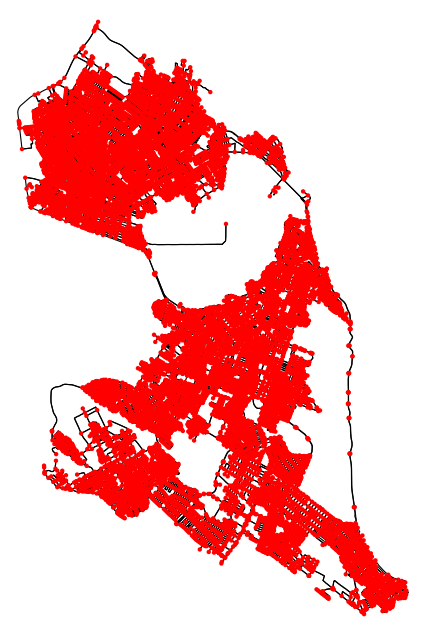

In [24]:
city = "Natal, RN, Brazil"

MultiDiGraph = ox.graph_from_place(city, network_type='drive')

fig, ax = ox.plot_graph(MultiDiGraph, bgcolor='white', node_color='red', edge_color='black', node_size=10, edge_linewidth=0.8)

## Network Analysis

Now that we have successfully plotted Natal's drive network graph, we can proceed to analyze some of its connectivity metrics. In this section, we will address questions related to the overall connectivity and structure of the city’s network.


### Connectivity Questions

To understand the city’s connectivity, we’ll investigate the following:
- **Is the network of Natal completely connected?**
- **If the network is not fully connected, how many distinct components does it contain?**



#### Methodology

Using NetworkX’s functions `is_connected` and `number_connected_components`, we will analyze the network to identify any distinct connected components within it. Specifically:
- **`is_connected`**: This function allows us to check whether the entire network is a single connected component.
- **`number_connected_components`**: If the network is not fully connected, this function will tell us the exact number of disconnected components present.



In [34]:
MultiGraph = ox.convert.to_undirected(MultiDiGraph) # Undirected Multigraph to use is_connected and number_connected_components

nx.is_connected(MultiGraph), nx.number_connected_components(MultiGraph)

(True, 1)

#### Findings

After running these functions, we find that:
- The network is **fully connected**.
- **Only one connected component** exists.

Therefore, Natal’s drive network forms a single Giant Connected Component (GCC), which implies that all areas in the city are reachable from one another, making the network robust and accessible. This structure ensures that any part of the city can be accessed from any other, potentially enhancing navigability and connectivity.

### Connections Strength

Considering Natal is a unique GCC, we can inquire:
- **Is the network of Natal a Strongly Connected Component (SCC)?**
- **Is the network of Natal a Weakly Connected Component (WCC)?**


#### Methodology

Using NetworkX’s functions `is_strongly_connected` and `is_weakly_connected`, we will analyze the network. Specifically:
- **`is_strongly_connected`**: This function allows us to check whether a subgraph network is a SCC.
- **`is_weakly_connected`**: This function allows us to check whether a subgraph network is a WCC.

In [33]:
nx.is_strongly_connected(MultiDiGraph), nx.is_weakly_connected(MultiDiGraph)

(False, True)

#### Findings

After running these functions, we find that the network is **weakly connected**.

It means Natal's drive map is a Weakly Connected Component (WCC), so  all areas are accessible when ignoring road directions. However, some routes may be one-way, preventing two-way travel on certain streets.

### Clustering Coefficient

Given the structure of Natal’s drive network, we can examine what the Clustering Coefficient metric reveals about its layout:

- **Does a high Clustering Coefficient suggest any specific characteristics of the network?**
  - A high clustering coefficient implies that intersections (nodes) frequently form closed loops or triangles. This suggests a more organic layout, which may be common in older or residential areas where roads are more likely to form local clusters.

- **What does a low Clustering Coefficient indicate in this context?**
  - A low clustering coefficient suggests a simpler, grid-like layout with fewer closed loops. This pattern is often seen in newer or planned urban areas, where roads connect intersections without forming excessive loops, prioritizing straightforward navigation.

What can the Average Clustering Coefficient tell us about:

- **The overall structure of the city’s network?**
- **The structure of a specific area?**




#### Methodology

Using NetworkX’s function `average_clustering`, we can answer these last ones. Specifically:
- **`average_clustering`**: This function allows us to get avarage clustering of a network.

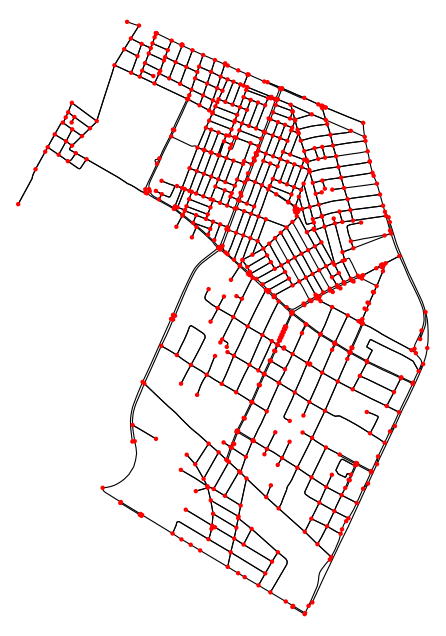

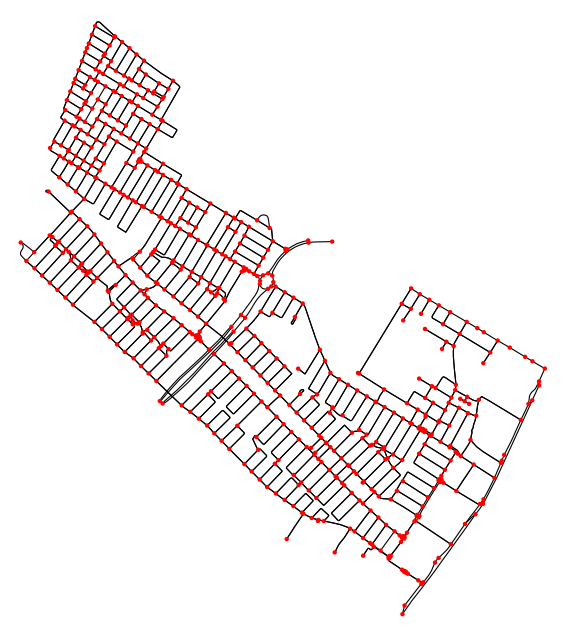

Natal:  0.021991140153321802
Candelária:  0.019363019881816858
Pitimbu:  0.06386696509207997


In [75]:
Candelaria_location = "Candelária, Natal, RN, Brazil"
Pitimbu_location = "Pitimbu, Natal, RN, Brazil"

Candelaria = ox.graph_from_place(Candelaria_location, network_type='drive')
Pitimbu = ox.graph_from_place(Pitimbu_location, network_type='drive')

fig, ax = ox.plot_graph(Candelaria, bgcolor='white', node_color='red', edge_color='black', node_size=10, edge_linewidth=0.8)
fig, ax = ox.plot_graph(Pitimbu, bgcolor='white', node_color='red', edge_color='black', node_size=10, edge_linewidth=0.8)

print("Natal: ", nx.average_clustering(ox.convert.to_digraph(MultiDiGraph)))
print("Candelária: ", nx.average_clustering(ox.convert.to_digraph(Candelaria)))
print("Pitimbu: ", nx.average_clustering(ox.convert.to_digraph(Pitimbu)))

#### Findings

After calculating the clustering coefficients for the city of Natal and two of its neighborhoods, Pitimbu and Candelária, we find the following values:
- **Natal**: 0.0219
- **Candelária**: 0.0194
- **Pitimbu**: 0.0639

These values reveal insights into the local interconnectedness and layout of each area:

- **Natal (0.0219)**: The low clustering coefficient for the entire city indicates a primarily grid-like, efficient layout with limited local loops, suggesting that the road network is designed for direct navigation without excessive clustering of intersections.

- **Candelária (0.0194)**: Candelária's clustering coefficient is similar to Natal’s overall value, implying a comparable road structure with minimal localized loops. This suggests an emphasis on straightforward connectivity, likely prioritizing major routes over local clusters.

- **Pitimbu (0.0639)**: Pitimbu has a noticeably higher clustering coefficient than both Natal and Candelária. This indicates that intersections in Pitimbu are more likely to form closed loops or clusters, suggesting a layout with more localized connectivity, typical of residential areas with organic street patterns.

These differences in clustering coefficients provide a snapshot of the road network’s design across different parts of Natal. While Natal and Candelária exhibit a more planned, grid-like structure, Pitimbu shows signs of a denser, more interconnected local layout.
